
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ai2es/WAF_ML_Tutorial_Part1/blob/main/MOOC_Notebooks/Notebook01_Explore_SEVIR.ipynb)

# Notebook 01: Explore SEVIR [MOOC Colab Version]

Authors: Randy J. Chase, David R. Harrison, Amanda Burke, Gary M. Lackmann, and Amy McGovern<br>
Institution: [AI2ES](https://www.ai2es.org)<br>
Associated paper: [A Machine Learning Tutorial for Operational Meteorology. Part I: Traditional Machine Learning](https://journals.ametsoc.org/view/journals/wefo/37/8/WAF-D-22-0070.1.xml)<br>
Original Github: [WAF_ML_Tutorial_Part1](https://github.com/ai2es/WAF_ML_Tutorial_Part1)

If you use this code or data in your work, please cite the paper: 

Chase, R. J., Harrison, D. R., Burke, A., Lackmann, G. M., & McGovern, A. (2022). A Machine Learning Tutorial for Operational Meteorology. Part I: Traditional Machine Learning, Weather and Forecasting, 37(8), 1509-1529.

### Primary Goal: Familiarize yourself with the dataset used in the tutorial


#### Background

As with all machine learning projects, it is vital the user understands the nuances of their dataset. Since machine learning learns from your dataset, you need to understand all the potential biases therein, which are likely propagated into your machine learning model. Since I am a visual learning, I always like to plot my data. If this is how you learn too, hopefully this network helps you understand a data example from [The Storm EVent ImagRy (SEVIR) dataset](https://proceedings.neurips.cc/paper/2020/file/fa78a16157fed00d7a80515818432169-Paper.pdf).

#### Quick notes on Jupyter

What is Google Colab?
    
- Google colab is a browser based version of python that an interactive coding project that lets you run python *cells*. You can think of these cells as any other script of code, but what this allows us to do is see the results of a specific section of code immediately, while also enabling us to debug things in a relatively quick manner. 

- One big perk of Google colab is that you get a fresh python install, 12 GB of RAM and 100 GB of disk space all for free. The only downfall is that this session will break if you dont do anything for a bit of time.
    
How do I run a code block?
    
- If you have never used jupyter notebooks, to run a cell, press "Shift and Enter", alternatively you can hit the play button to the left.

How do I know when its done running?
    
- You will see a circle going round and round when the code is running (with a stop button on the inside). Once it has a number, that means it is done running. The number corresponds to the number of cell executions have been done since starting your notebook.

#### Step 0: Get the github repo (we need some of the functions there)

The first step with all of these Google Colab notebooks will be to grab the github repo and cd into the notebooks directory. 

To run things from the command line, put a ```!``` before your code

In [2]:
#get the github repo 
!git clone https://github.com/ai2es/WAF_ML_Tutorial_Part1.git 

#cd into the repo so the paths work 
import os 
os.chdir('/content/WAF_ML_Tutorial_Part1/jupyter_notebooks/')

Cloning into 'WAF_ML_Tutorial_Part1'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 296 (delta 138), reused 232 (delta 95), pack-reused 0
Receiving objects: 100% (296/296), 192.88 MiB | 24.66 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Checking out files: 100% (99/99), done.


#### Step 1: Imports

The first step with any python code is to import the packages/functions you need. That is what we do in the cell below

In [7]:
#needed packages 
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np

#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')
from aux_functions import show_vals,draw_zoom_window,get_right_units_vil

#plot parameters that I personally like, feel free to make these your own.
import matplotlib
matplotlib.rcParams['axes.facecolor'] = [0.9,0.9,0.9] #makes a grey background to the axis face
matplotlib.rcParams['axes.labelsize'] = 14 #fontsize in pts
matplotlib.rcParams['axes.titlesize'] = 14 
matplotlib.rcParams['xtick.labelsize'] = 12 
matplotlib.rcParams['ytick.labelsize'] = 12 
matplotlib.rcParams['legend.fontsize'] = 12 
matplotlib.rcParams['legend.facecolor'] = 'w' 
matplotlib.rcParams['savefig.transparent'] = False

#make default resolution of figures much higher (i.e., High definition)
%config InlineBackend.figure_format = 'retina'

#### Step 2: load some data
The raw data are actually in hdf5 files (a common file type), but I have gone ahead and made something that smaller and that is easier to deal with. We will leverage xarray to open this simple netCDF4 file I made of a storm from August 2017. 

In [8]:
#open an example storm 
ds = xr.open_dataset('../datasets/sevir/onestorm.nc')
#see the data by printing ds. By putting at the bottom of the cell, it is automatically printed
ds

<xarray.Dataset>
Dimensions:            (t: 12, x: 768, x2: 192, x3: 384, x4: 48, y: 768, y2: 192, y3: 384, y4: 48)
Dimensions without coordinates: t, x, x2, x3, x4, y, y2, y3, y4
Data variables:
    visible            (x, y, t) float32 ...
    water_vapor        (x2, y2, t) float32 ...
    clean_infrared     (x2, y2, t) float32 ...
    vil                (x3, y3, t) float32 ...
    lightning_flashes  (x4, y4, t) float32 ...
Attributes:
    t:        time dimension of all images. These are 5-min time steps
    x:        x pixel dimension of the visible imagery
    y:        y pixel dimension of the visible imagery
    x2:       x pixel dimension of the water vapor and infrared imagery
    y2:       y pixel dimension the water vapor and infrared imagery
    x3:       x pixel dimension of the vertically integrated liquid imagery
    y3:       y pixel dimension the vertically integrated liquid imagery
    x4:       x pixel dimension of the lightning flashes
    y4:       y pixel dimension of the lightning flashes

You should see that there is the 5 variables in this file. And hopefully you can see how most of the variables have different x,y dimensions (e.g., x,x2,x3,x4). This is because each measurement has slightly different resolutions. 

#### Step 3: Plot an image

Let's take a look at the visible imagery (```ds.visible```). Note that the visible imagery is the 'reflectance factor', and to save the data in a size efficient way, they were originally saved as integers (i.e., no decimal places) and multiplied by 10^4, so to scale back, we must multiply by 10^-4.

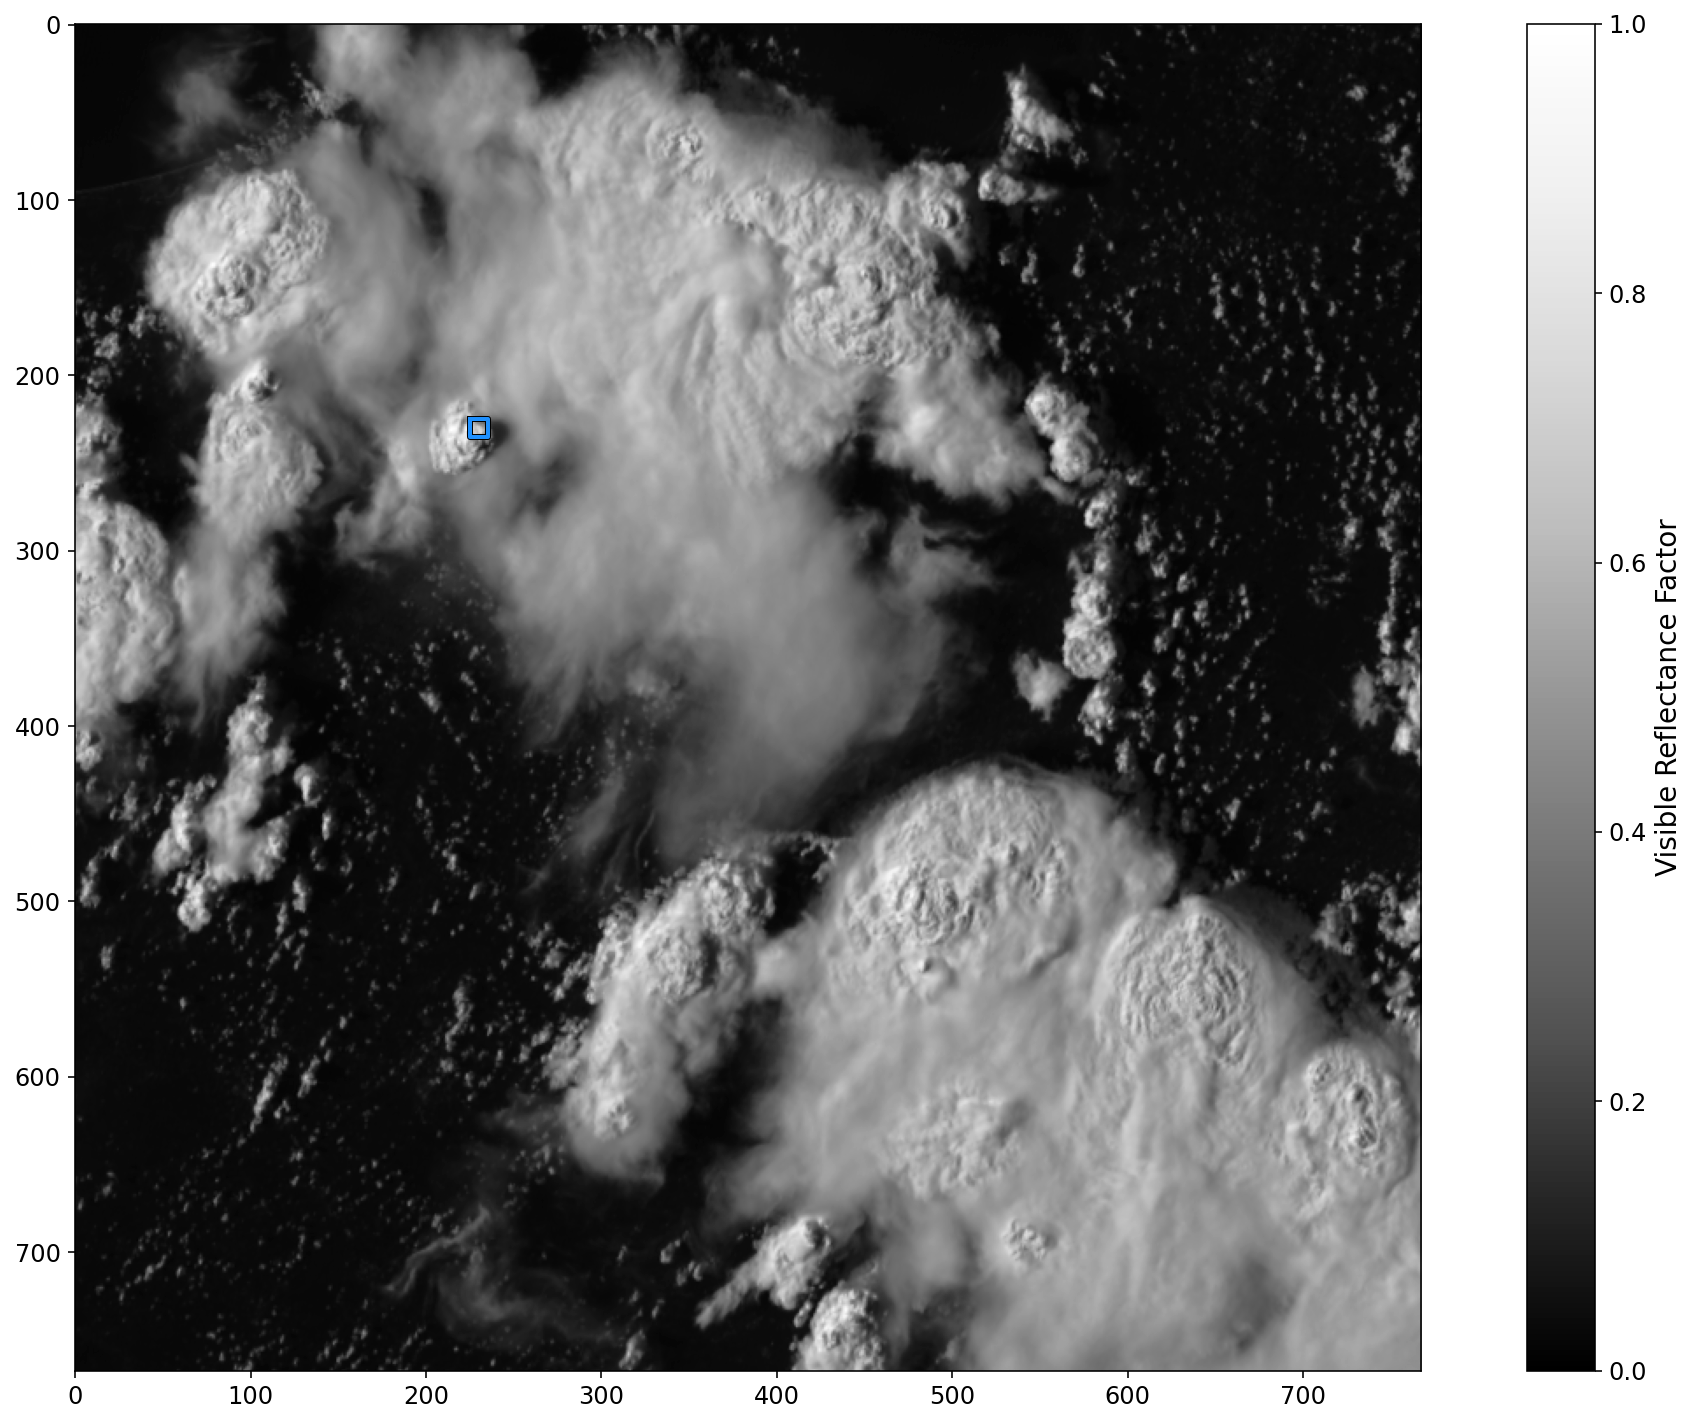

In [9]:
#make a figure with size 15 inches in the x, and 10 inches in the y
plt.figure(figsize=(15,10))
#show all x pixels (:) and all y pixels (:) and the first time step, with a Grey colorscale, and the color min 0 and color max 1. 
plt.imshow(ds.visible[:,:,0]*1e-4,cmap='Greys_r',vmin=0,vmax=1)

#draw a small box where we will zoom in on the next code block
xzoom,yzoom = draw_zoom_window(plt.gca(),225,225)

#show us the colorbar 
plt.colorbar(label='Visible Reflectance Factor')
#a function that cleans some of the figure up. 
plt.tight_layout()

Here we can see an image that is full of storms! 

#### Step 4: Zoom in to the blue box 

For those who have not thought about how the niddy griddy details of using a satellite image for machine learning, satellite imagery are rasters. In other words, they are a bunch of pixels with assigned values. For example, let us visualize a very small portion of the above image

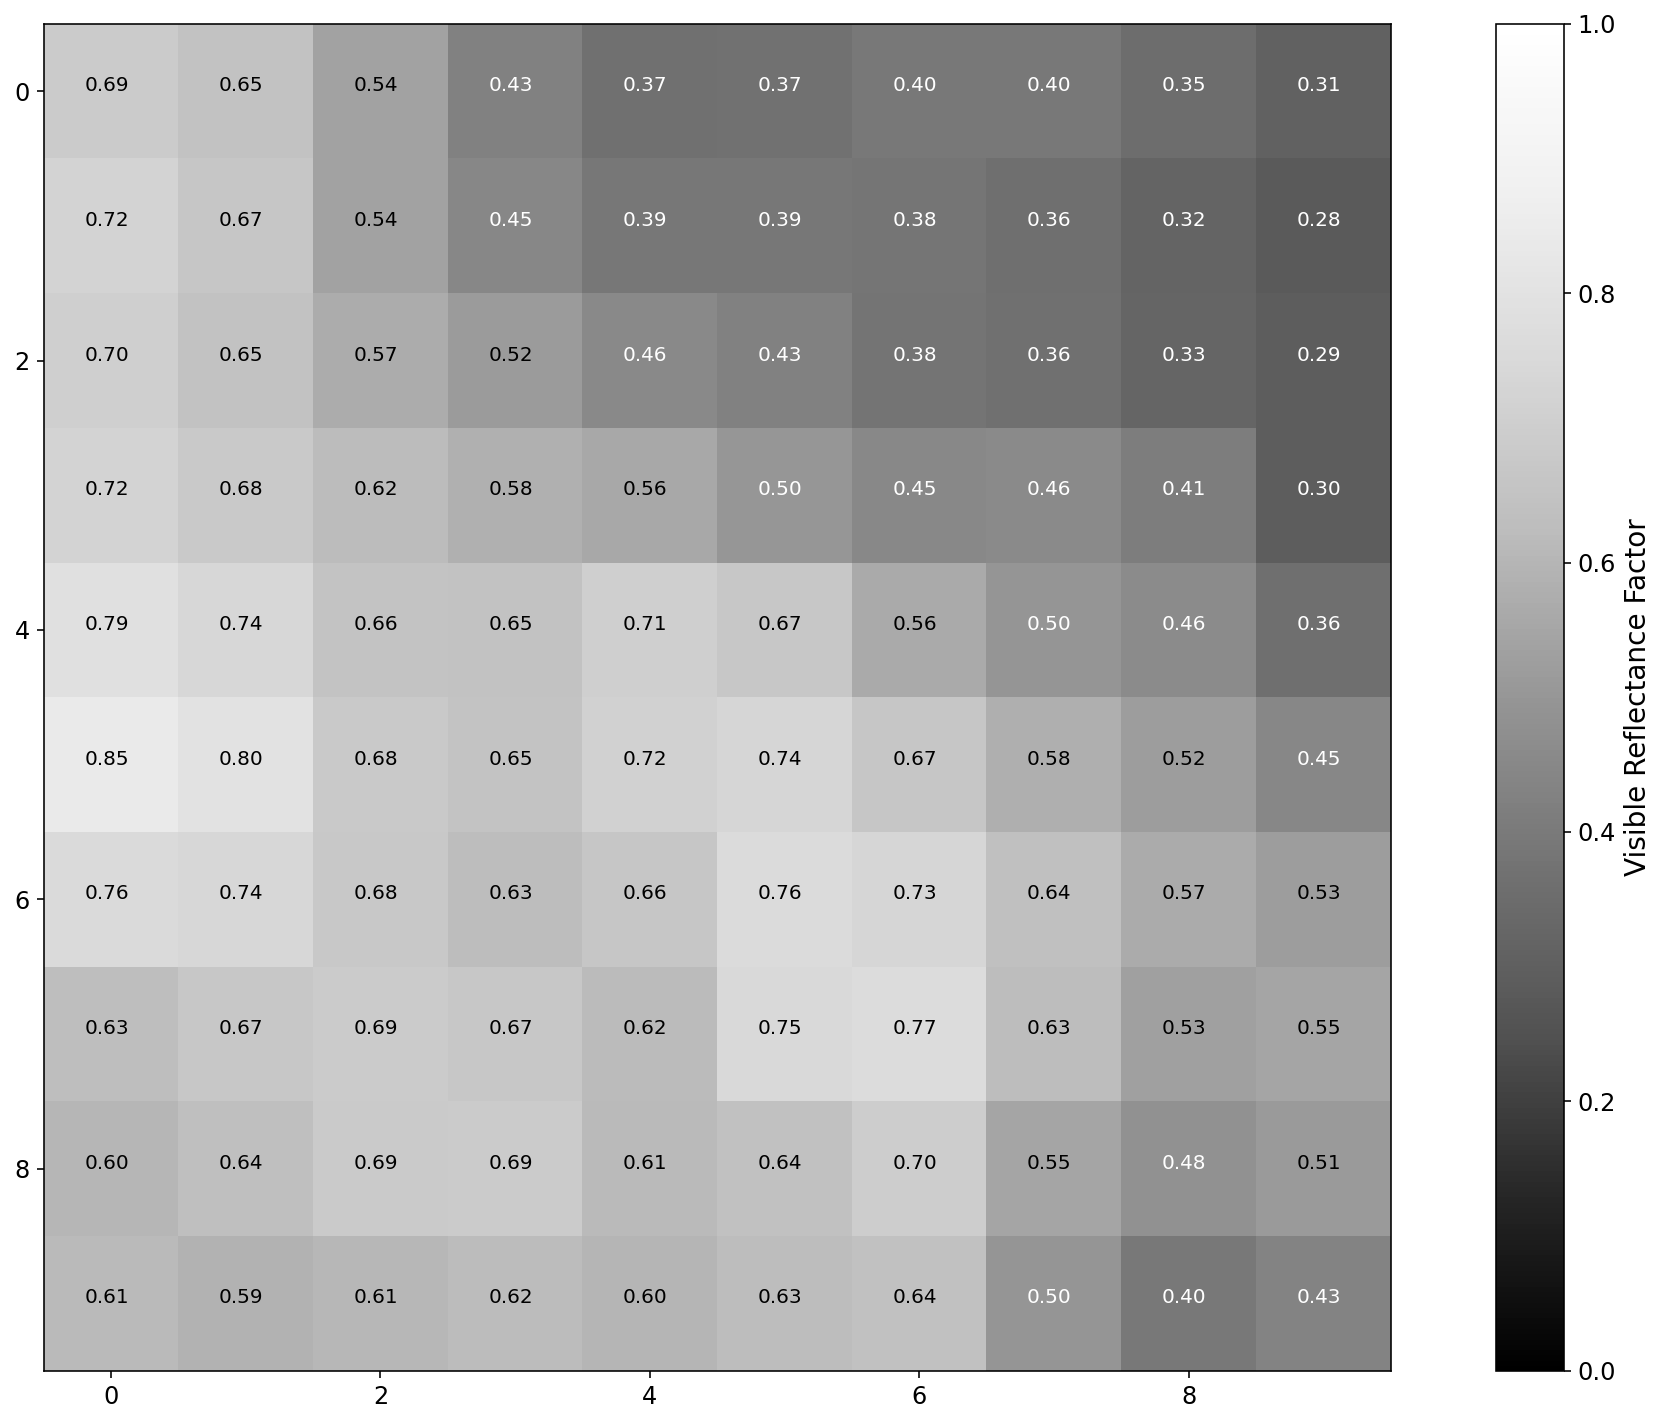

In [10]:
#make a figure with size 15 inches in the x, and 10 inches in the y
plt.figure(figsize=(15,10))
#show all x pixels (:) and all y pixels (:) and the first time step, with a Grey colorscale, and the color min 0 and color max 1. 
plt.imshow(ds.visible[xzoom:xzoom+10,yzoom:yzoom+10,0]*1e-4,cmap='Greys_r',vmin=0,vmax=1)
#a function that will put text on every pixel 
show_vals(ds.visible[xzoom:xzoom+10,yzoom:yzoom+10,0]*1e-4,ax=plt.gca())
#show us the colorbar 
plt.colorbar(label='Visible Reflectance Factor')
#a function that cleans some of the figure up. 
plt.tight_layout()

I hope this example shows you what ultimately the data look like when you zoom into the pixel level. For our ML models, we need to extract some sort of numerical characteristic of these images. 

#### Step 5: Show one time step, but all data

For completeness, let’s take a look at all available data. In other words, let’s make a plot like Figure 7 in the paper.

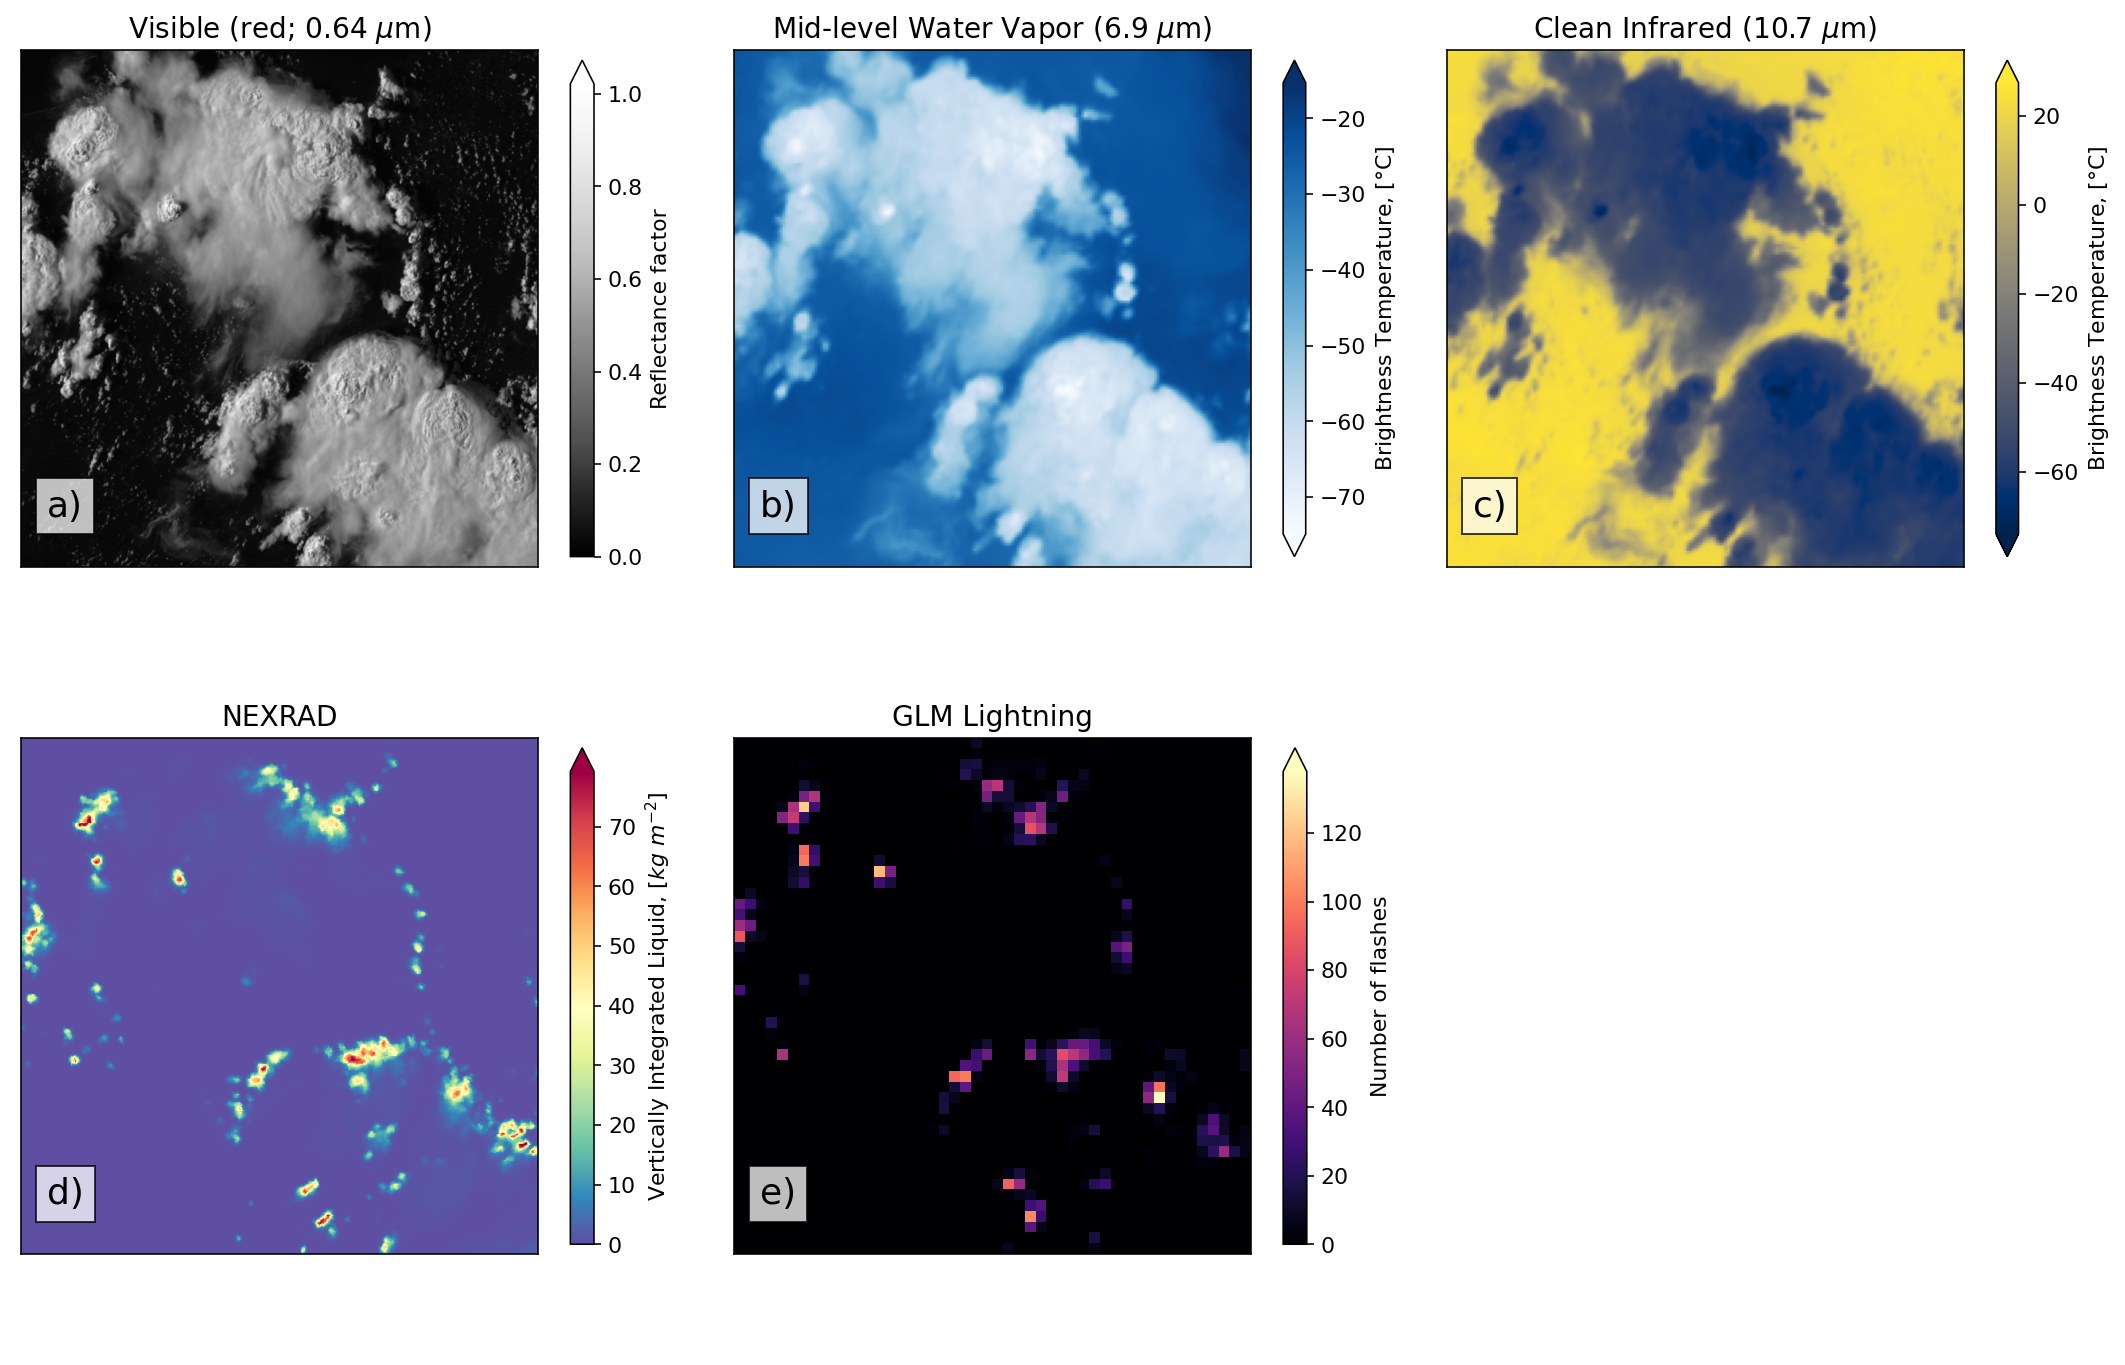

In [13]:
#make figure and axis objects
fig,axs = plt.subplots(2,3,figsize=(15,10))

#axs is [2,3] by default, lets just ravel these to [6,]
axs = axs.ravel()

#set the facecolor to white so we can copy the image straight from the notebook 
fig.set_facecolor('w')

#choose time to show 
frame_idx = 0

#some parameters to make it pretty 
c_scale = 0.7     #c_scale is the shrink parameter for the colorbar.
fs3 = 11          #fs3 is fontsize number 3
fs4 = 18          #fs4 is fontsize number 4
props = dict(boxstyle='square', facecolor='White', alpha=0.75) #these are some properties for the subplotlabling (e.g., (a),(b) etc.)

############### subplot 1: Visible imagery ##################
#grab the first subplot
ax = axs[0]  
#plot our visible image
pm = ax.imshow(ds.visible[:,:,frame_idx]*1e-4,cmap='Greys_r',vmin=0)
#plot colorbar 
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
#add colorbarlabel
cbar.set_label('Reflectance factor',fontsize=fs3)
#change tick label sizes 
cbar.ax.tick_params(labelsize=fs3)
#set title of the subplot
ax.set_title('Visible (red; 0.64 $\mu$m)')
#add subplot label
ax.text(0.05, 0.15, 'a)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 2: Water vapor imagery ############### 
#comments will be the same as the first subplot so look there if you want those.
ax = axs[1]
pm = ax.imshow(ds.water_vapor[:,:,frame_idx]*1e-2,cmap='Blues') 
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='both')
cbar.set_label('Brightness Temperature, [$\degree$C]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('Mid-level Water Vapor (6.9 $\mu$m)')
ax.text(0.05, 0.15, 'b)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)

############### subplot 3: Infrared imagery ##################
ax = axs[2]
pm = ax.imshow(ds.clean_infrared[:,:,frame_idx]*1e-2,cmap='cividis')
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='both')
cbar.set_label('Brightness Temperature, [$\degree$C]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('Clean Infrared (10.7 $\mu$m)')
ax.text(0.05, 0.15, 'c)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 4: Vertically Integrated Liquid ######
ax = axs[3]
#need to convert things to the proper units...
vil = get_right_units_vil(ds.vil.values)
pm = ax.imshow(vil[:,:,frame_idx],cmap='Spectral_r',vmin=0)
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
cbar.set_label('Vertically Integrated Liquid, [$kg \ m^{-2}$]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('NEXRAD')
ax.text(0.05, 0.15, 'd)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 5: GLM Lightning Flashes #############
ax = axs[4]
pm = ax.imshow(ds.lightning_flashes[:,:,frame_idx],cmap='magma')
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
cbar.set_label('Number of flashes',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('GLM Lightning')
ax.text(0.05, 0.15, 'e)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

#turn off the ticks and labels for all plots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

#dont need the 6th subplot, so turn that off
axs[-1].axis('off')

#again a helpful function to properly space things out 
plt.tight_layout()

#### Step 6: Change the time step 

To choose a different time step, we just change frame_idx

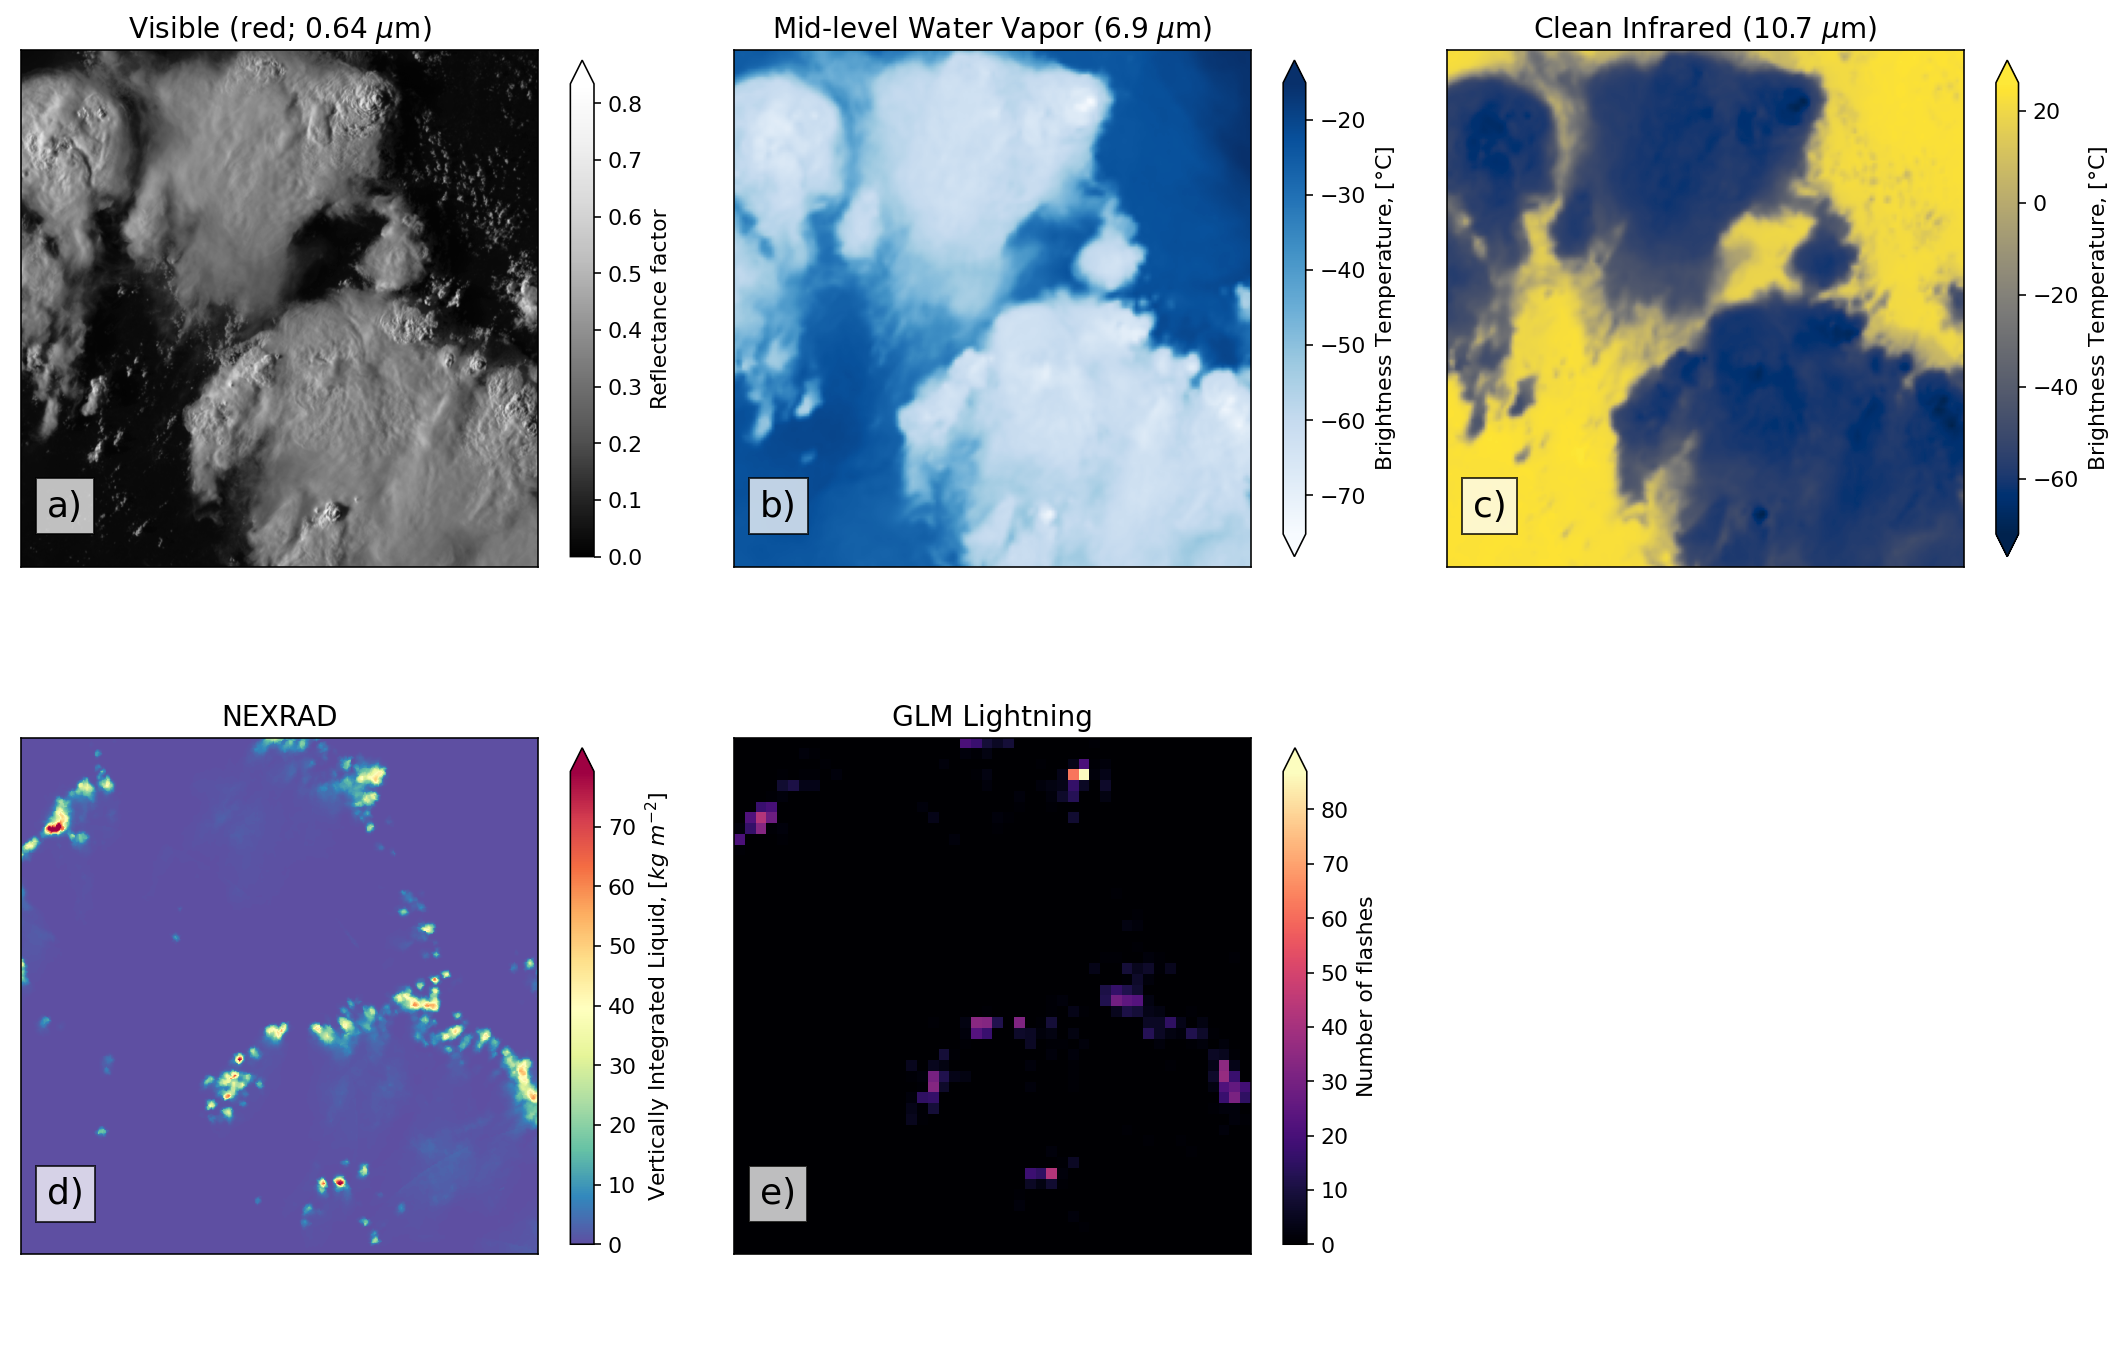

In [15]:
#make figure and axis objects
fig,axs = plt.subplots(2,3,figsize=(15,10))

#axs is [2,3] by default, lets just ravel these to [6,]
axs = axs.ravel()

#set the facecolor to white so we can copy the image straight from the notebook 
fig.set_facecolor('w')

#choose time to show 
frame_idx = 11  # <--- GO AHEAD AND PICK ANY NUMBER BETWEEN 0 and 11! I dare you!! 

#some parameters to make it pretty 
c_scale = 0.7     #c_scale is the shrink parameter for the colorbar.
fs3 = 11          #fs3 is fontsize number 3
fs4 = 18          #fs4 is fontsize number 4
props = dict(boxstyle='square', facecolor='White', alpha=0.75) #these are some properties for the subplotlabling (e.g., (a),(b) etc.)

############### subplot 1: Visible imagery ##################
#grab the first subplot
ax = axs[0]  
#plot our visible image
pm = ax.imshow(ds.visible[:,:,frame_idx]*1e-4,cmap='Greys_r',vmin=0)
#plot colorbar 
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
#add colorbarlabel
cbar.set_label('Reflectance factor',fontsize=fs3)
#change tick label sizes 
cbar.ax.tick_params(labelsize=fs3)
#set title of the subplot
ax.set_title('Visible (red; 0.64 $\mu$m)')
#add subplot label
ax.text(0.05, 0.15, 'a)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 2: Water vapor imagery ############### 
#comments will be the same as the first subplot so look there if you want those.
ax = axs[1]
pm = ax.imshow(ds.water_vapor[:,:,frame_idx]*1e-2,cmap='Blues') 
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='both')
cbar.set_label('Brightness Temperature, [$\degree$C]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('Mid-level Water Vapor (6.9 $\mu$m)')
ax.text(0.05, 0.15, 'b)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)

############### subplot 3: Infrared imagery ##################
ax = axs[2]
pm = ax.imshow(ds.clean_infrared[:,:,frame_idx]*1e-2,cmap='cividis')
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='both')
cbar.set_label('Brightness Temperature, [$\degree$C]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('Clean Infrared (10.7 $\mu$m)')
ax.text(0.05, 0.15, 'c)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 4: Vertically Integrated Liquid ######
ax = axs[3]
#need to convert things to the proper units...
vil = get_right_units_vil(ds.vil.values)
pm = ax.imshow(vil[:,:,frame_idx],cmap='Spectral_r',vmin=0)
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
cbar.set_label('Vertically Integrated Liquid, [$kg \ m^{-2}$]',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('NEXRAD')
ax.text(0.05, 0.15, 'd)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

############### subplot 5: GLM Lightning Flashes #############
ax = axs[4]
pm = ax.imshow(ds.lightning_flashes[:,:,frame_idx],cmap='magma')
cbar = plt.colorbar(pm,ax=ax,shrink=c_scale,extend='max')
cbar.set_label('Number of flashes',fontsize=fs3)
cbar.ax.tick_params(labelsize=fs3)
ax.set_title('GLM Lightning')
ax.text(0.05, 0.15, 'e)', transform=ax.transAxes,fontsize=fs4,
        verticalalignment='top', bbox=props)
##############################################################

#turn off the ticks and labels for all plots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

#dont need the 6th subplot, so turn that off
axs[-1].axis('off')

#again a helpful function to properly space things out 
plt.tight_layout()

We have successfully visualized a very small subset of the entire SEVIR dataset. I encourage people wanting to use this dataset for their work to go read the paper: 
[SEVIR paper](https://papers.nips.cc/paper/2020/hash/fa78a16157fed00d7a80515818432169-Abstract.html)

Please proceed on to Notebook 2.